In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Nomor 1
# Load gambar
img1 = cv2.imread("nama.jpg")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

In [3]:
# Range warna
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

In [4]:
# Fungsi perbaikan dengan deteksi latar putih menggunakan threshold
def highlight_non_color_text(mask_color):
    result = np.ones_like(img1_rgb) * 255  # background putih
    # Deteksi background putih "cukup terang" (bukan teks)
    white_bg_mask = np.all(img1_rgb >= [180, 180, 180], axis=-1)
    # Teks non-target adalah piksel yang:
    # - Tidak terdeteksi warna target (mask_color == 0)
    # - Bukan background putih
    text_mask = np.logical_and(mask_color == 0, ~white_bg_mask)
    # Buat teks jadi hitam
    result[text_mask] = [0, 0, 0]
    
    return result

In [5]:
# Gambar hasil
highlight_blue = highlight_non_color_text(mask_blue)
highlight_red = highlight_non_color_text(mask_red)
highlight_green = highlight_non_color_text(mask_green)

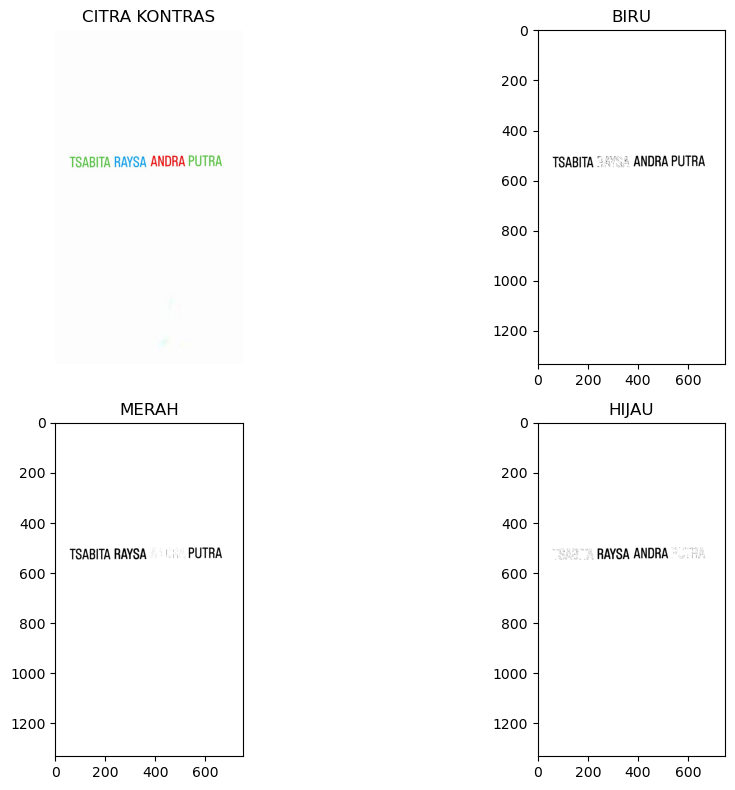

In [6]:
# Tampilkan hasil dalam layout 2x2
plt.figure(figsize=(12, 8))

# Citra asli
plt.subplot(2, 2, 1)
plt.imshow(img1_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

# Biru
plt.subplot(2, 2, 2)
plt.imshow(highlight_blue)
plt.title("BIRU")
plt.axis('on')

# Merah
plt.subplot(2, 2, 3)
plt.imshow(highlight_red)
plt.title("MERAH")
plt.axis('on')

# Hijau
plt.subplot(2, 2, 4)
plt.imshow(highlight_green)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

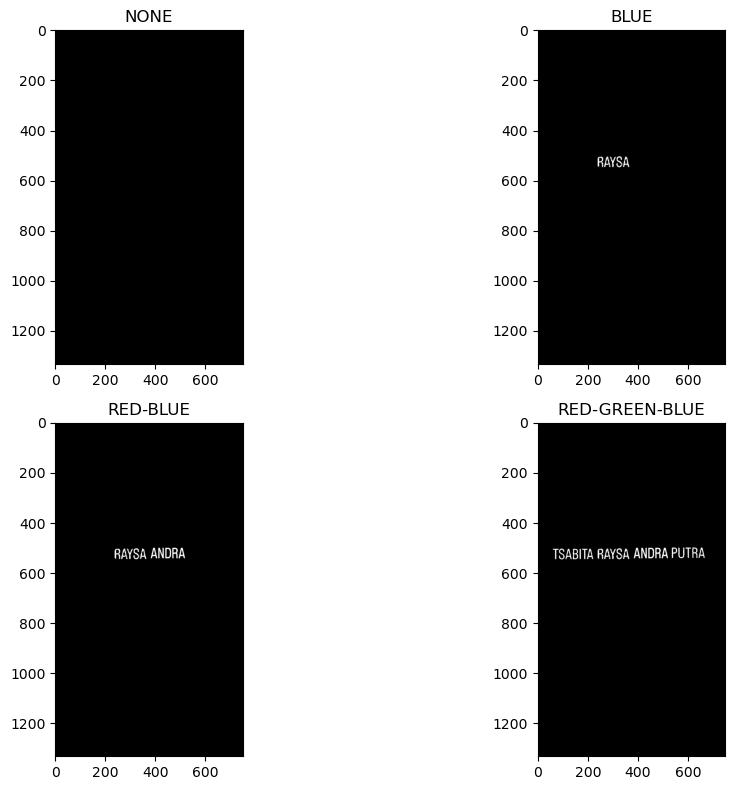

In [8]:
#Nomor 2
none = np.zeros_like(img1_rgb[:, :, 0])  # kosong
red_blue = cv2.bitwise_or(mask_red, mask_blue)
rgb_all = cv2.bitwise_or(red_blue, mask_green)

# Daftar judul dan hasil
titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
images = [none, mask_blue, red_blue, rgb_all]

# Plot hasil
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [9]:
#Nomor 3
#Load gambar
img2 = cv2.imread('backlight1.jpg') 
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [10]:
#Konversi ke Grayscale
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [11]:
#Perbaikan kecerahan (menambah pixel intensity)
def brighten(img2_gray, value=150):
    return cv2.add(img2_gray, value)

#Perbaikan kontras (histogram equalization)
def enhance_contrast(img2_gray):
    return cv2.equalizeHist(img2_gray)

#Perbaikan kecerahan + kontras
bright = brighten(gray)
contrast = enhance_contrast(gray)
bright_contrast = enhance_contrast(bright)

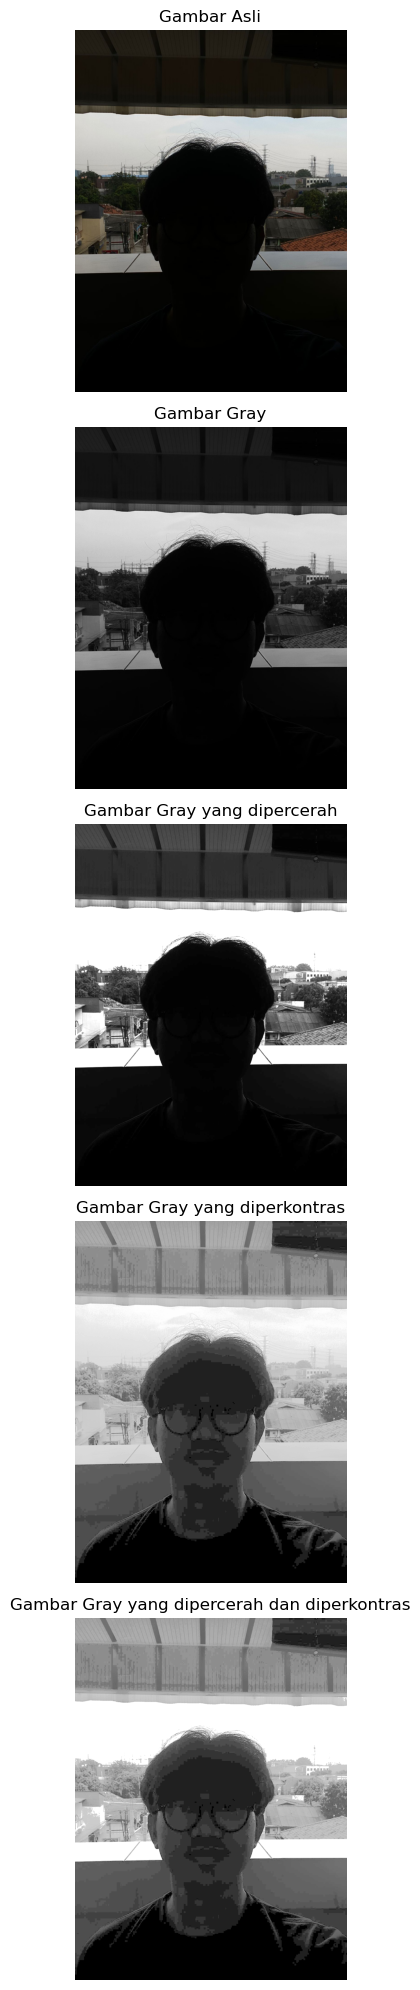

In [12]:
#Plot hasil
titles = ['Gambar Asli', 'Gambar Gray', 'Gambar Gray yang dipercerah', 
          'Gambar Gray yang diperkontras', 'Gambar Gray yang dipercerah dan diperkontras']
images = [img2_rgb, gray, bright, contrast, bright_contrast]
cmaps = [None, 'gray', 'gray', 'gray', 'gray']

plt.figure(figsize=(6, 20))  # Ukuran vertikal
for i in range(len(images)):
    plt.subplot(len(images), 1, i + 1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.axis('off')
    plt.title(titles[i], fontsize=12, ha='center')

plt.tight_layout()
plt.show()